In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
# 设置中文显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# load data
data = pd.read_excel("./k_fgj_ggzfzl_gr_1.xls")
data

,保障对象姓名,保障对象身份证号,所属区域,项目信息,项目地址,户型,建筑面积（平方米）
0,葛传凤,5101111965****0784,金牛区,慧苑,NaN,1室1厅1卫,50.15
1,林香,5101261976****4024,青羊区,零星房源,NaN,NaN,35.88
2,陈克彬,5101021957****1271,锦江区,紫气东来,NaN,1室1厅1卫,48.00
3,陈邦吉,5101021950****4371,锦江区,紫气东来,NaN,1室1厅1卫,47.99
4,张珍曦,5101031953****2245,成华区,慧苑,NaN,1室1厅1卫,48.54
5,陶雨欣,5109221999****3261,青羊区,西蜀瑞苑,NaN,1室1厅1卫,49.86
6,王雨诗,5101142013****020X,金牛区,紫气东来,NaN,1室1厅1卫,48.47
7,魏鑫宇,5113222005****6872,锦江区,隆兴嘉苑,NaN,2室2厅1卫1阳台,49.75
8,赵香,5101021955****4668,锦江区,锦绣光华,NaN,2室2厅1卫,81.43
9,龚丕林,5101031966****1610,金牛区,西蜀瑞苑,NaN,1室1厅1卫,49.81


In [50]:
"""
# 1. 查看个人是否拥有多套住房租赁信息
# 以姓名和身份证号作为共同的关键字去重分析
columns = data.columns
print(columns)
person_ana = data
person_ana['name_id'] = data[columns[0]] + "_" + data[columns[1]]
plt.bar([columns[0], 'name_id'], [data[columns[0]].count(), person_ana['name_id'].count()], width=0.2)
plt.show()
print(data[columns[0]].count())
print(person_ana['name_id'].count())
"""

'\n# 1. 查看个人是否拥有多套住房租赁信息\n# 以姓名和身份证号作为共同的关键字去重分析\ncolumns = data.columns\nprint(columns)\nperson_ana = data\nperson_ana[\'name_id\'] = data[columns[0]] + "_" + data[columns[1]]\nplt.bar([columns[0], \'name_id\'], [data[columns[0]].count(), person_ana[\'name_id\'].count()], width=0.2)\nplt.show()\nprint(data[columns[0]].count())\nprint(person_ana[\'name_id\'].count())\n'

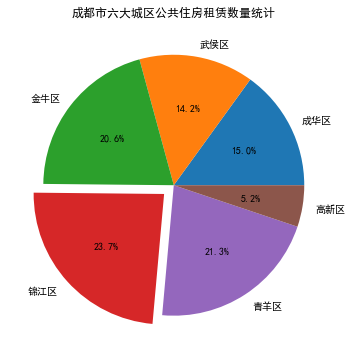

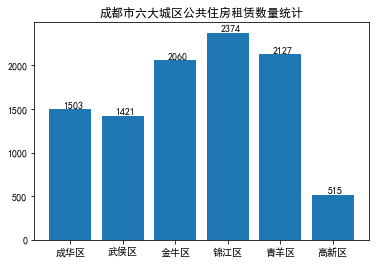

In [51]:
# 1. 分析各城区租赁信息
data.columns = ["name", "id", "partition", "infos", "location", "type", "size"]
columns = data.columns
data_groupby_partition = data.groupby(columns[2])[columns].count()
partition_city_count = data_groupby_partition["name"]
# print(partition_city_count)
# print(partition_city_count.values)
# print(partition_city_count.index)
explode = [0,0,0,0.1,0,0]
plt.figure(figsize=(6,6))
plt.pie(partition_city_count.values, explode=explode,labels=partition_city_count.index, autopct='%1.1f%%')
plt.title("成都市六大城区公共住房租赁数量统计")
plt.savefig("./成都市六大城区公共住房租赁数量统计-饼图.jpg")
plt.show()
x = range(6)
plt.bar(x, partition_city_count.values)
for x,y in zip(range(6), partition_city_count.values):
    plt.text(x+0.05,y+0.05,'%d'%y, ha='center',va='bottom')
plt.title("成都市六大城区公共住房租赁数量统计")
plt.xticks(range(6), partition_city_count.index)
plt.savefig("./成都市六大城区公共住房租赁数量统计-条形图.jpg")
plt.show()

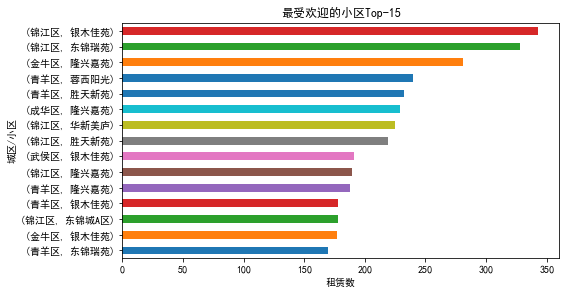

In [89]:
# 2.分析最受欢迎的小区
data.groupby([columns[2], columns[3]])[columns[3]].count().sort_values(ascending=False)\
.head(15).sort_values().plot(kind='barh', figsize=(8,4))
plt.title("最受欢迎的小区Top-15")
plt.tight_layout()
plt.ylabel("城区/小区")
plt.xlabel("租赁数")
plt.savefig("./最受欢迎的小区Top-15.jpg")
plt.show()

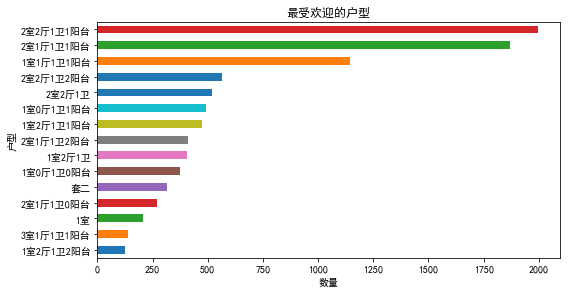

In [92]:
# 3. 分析最受欢迎的户型
data.groupby(columns[5])[columns[5]].count().sort_values(ascending=False)\
.head(15).sort_values().plot(kind='barh', figsize=(8,4))
plt.title("最受欢迎的户型")
plt.tight_layout()
plt.ylabel("户型")
plt.xlabel("数量")
plt.savefig("./最受欢迎的户型.jpg")
plt.show()

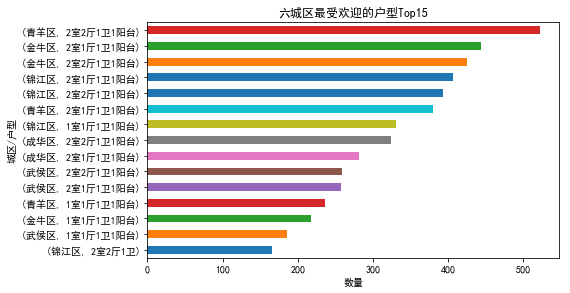

In [102]:
# 3. 按城区分析最受欢迎的户型
data.groupby([columns[2], columns[5]])[columns[5]].count().sort_values(ascending=False)\
.head(15).sort_values().plot(kind='barh', figsize=(8,4))
plt.title("六城区最受欢迎的户型Top15")
plt.tight_layout()
plt.ylabel("城区/户型")
plt.xlabel("数量")
plt.savefig("./六城区最受欢迎的户型Top15.jpg")
plt.show()

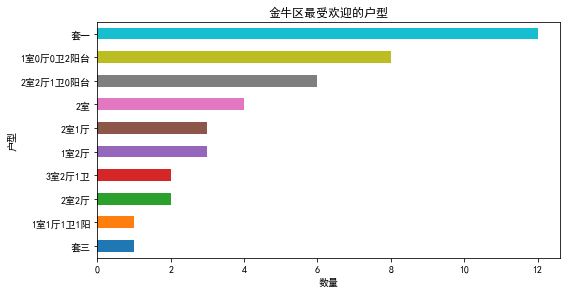

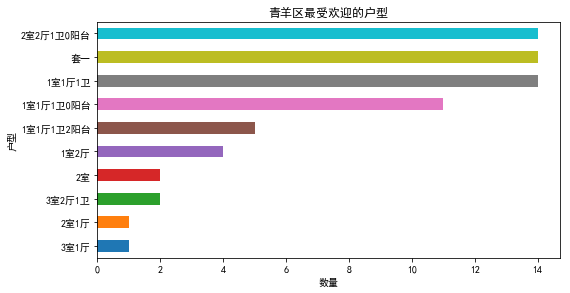

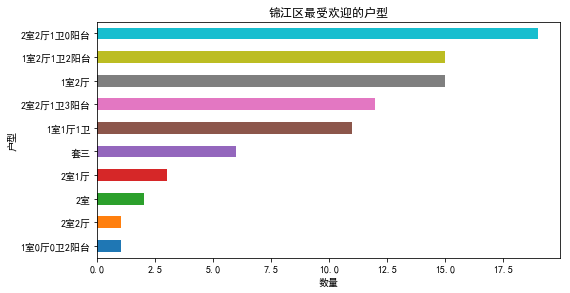

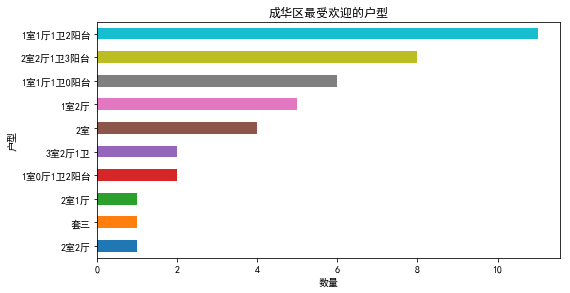

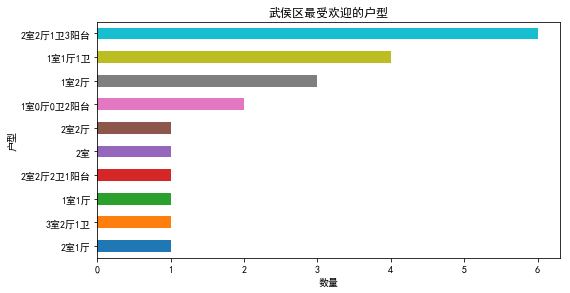

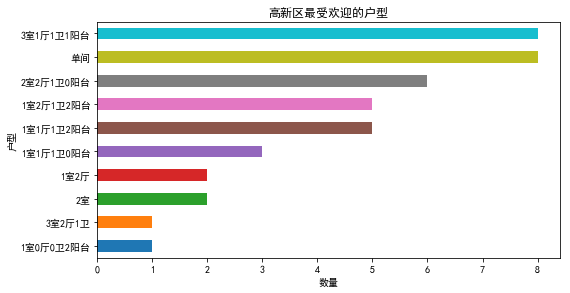

In [158]:
# 6张图-按照城区单独分析最受欢迎的户型
#print(data.groupby([columns[2], columns[5]])[columns[2]].count().loc["成华区"])
partitions = pd.unique(data["partition"])

# 便利六个城区
for p,i in zip(partitions, range(6)):
    data.groupby([columns[2], columns[5]])[columns[2]].count().loc[p].sort_values()\
        .head(10).plot(kind='barh', figsize=(8,4))
    plt.title("{}最受欢迎的户型".format(p))
    plt.tight_layout()
    plt.ylabel("户型")
    plt.xlabel("数量")
    plt.savefig("./{}最受欢迎的户型Top15.jpg".format(p))
    plt.show()

G:\soft\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


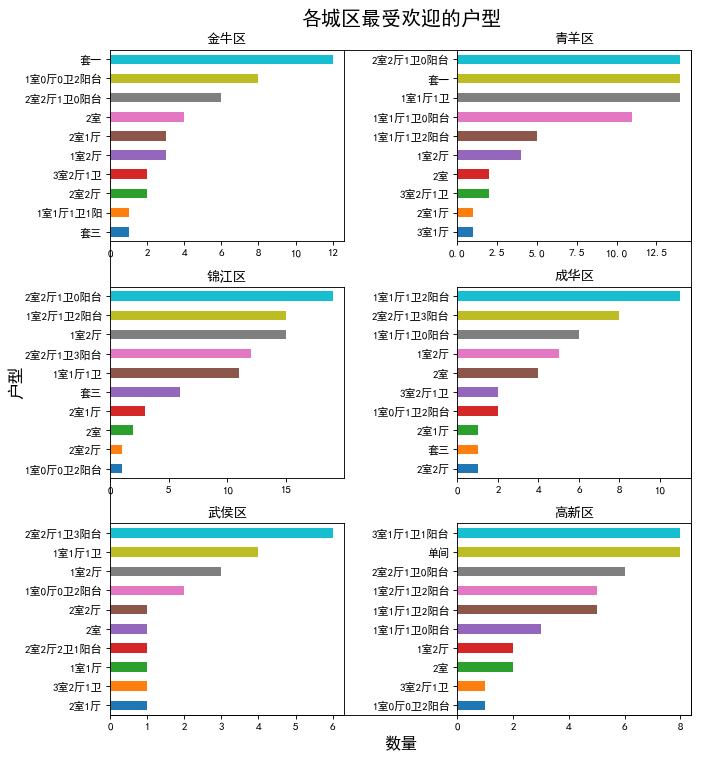

In [162]:
# 一张图-按照城区单独分析最受欢迎的户型
#print(data.groupby([columns[2], columns[5]])[columns[2]].count().loc["成华区"])
partitions = pd.unique(data["partition"])
pf = plt.figure(figsize=(10,12), dpi=80)
# 设置标题
plt.title("各城区最受欢迎的户型\n", fontsize=18)
plt.xlabel("\n数量", fontsize=15)
plt.ylabel("户型\n\n\n\n\n", fontsize=15)
# 避免坐标重叠
plt.xticks([])
plt.yticks([])

# 便利6个城区，并添加子图
for p,i in zip(partitions, range(6)):
    pf.add_subplot(3,2,i+1)
    data.groupby([columns[2], columns[5]])[columns[2]].count().loc[p].sort_values()\
        .head(10).plot(kind='barh', figsize=(10,10))
    plt.tight_layout()
    plt.title("{}".format(p))
    plt.ylabel("")

pf.savefig("./各城区最受欢迎的户型Top10.jpg")
pf.show()


[50, 60)     5117
[40, 50)     2971
[30, 40)     1152
[60, 70)      659
[20, 30)       47
[80, 90)       32
[70, 80)       16
[90, 100)       6
Name: size, dtype: int64
[90, 100)       6
[40, 50)     2971
[80, 90)       32
[60, 70)      659
[20, 30)       47
[30, 40)     1152
[70, 80)       16
[50, 60)     5117
dtype: int64


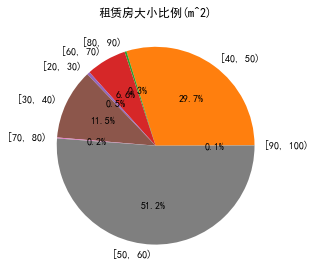

In [364]:
# 六城区总的房间大小分区统计
max = data["size"].max()
min = data["size"].min()
limit = range(int(min-min%10), int(max+10), 10)
size_limit_group = pd.cut(data["size"], limit, right=False)
size_group_count = size_limit_group.value_counts()#.sample(frac=1)#.sort_index()

data_sort = size_limit_group.value_counts()#.sample(frac=1)#.sort_values()
# 按照大小间隔排序，避免重叠
# 如:1 2 3 4 5 6 7  ->  7 2 5 4 3 6 1
print(data_sort)
length = len(data_sort.values)
indexs = [str(x) for x in data_sort.index]
for i, j in zip(range(0, length, 2), range(length-1, 0, -2)):
    if j <= i:
        break
    data_sort.iloc[i],data_sort.iloc[j] = data_sort.iloc[j],data_sort.iloc[i]
    indexs[i], indexs[j] = indexs[j], indexs[i]
    data_sort = pd.Series(data_sort.values, index=indexs)
print(data_sort)

# 绘图
plt.pie(data_sort.values, labels=[str(x) for x in data_sort.index],autopct='%1.1f%%')
plt.title("租赁房大小比例(m^2)")
plt.tight_layout()
plt.savefig("./租赁房大小比例(m^2).jpg")
plt.show()
